# Pandas 
`02_pandas.ipynb`

## 특징
- 표(테이블) 데이터를 다루는데 특화
- 다양한 외부 소스에서 데이터 가져오기 (csv, excel, SQL db)
- 데이터 정제, 변환, 분석에 필요한 기능 다수
- 결측치 처리, 그룹화, 병합 작업에 효율

In [ ]:
%pip install pandas

In [ ]:
import numpy as np
import pandas as pd

# Numpy 배열
np_array = np.arange(1, 10).reshape(3, 3)
print(np_array)

# Pandas 데이터프레임
df = pd.DataFrame(np_array, columns=['A', 'B', 'C'])
print(df)

## Series
1차원 배열(벡터) with 레이블

In [ ]:
import pandas as pd

# 기본 Seires 생성 (별말 없으면 숫자 index)
s1 = pd.Series([1, 3, 5, 7, 9])
print(s1)

# 인덱스 지정
s2 = pd.Series([1, 3, 5, 7, 9], index=['a', 'b', 'c', 'd', 'e'])
print(s2)

# dict로 생성
d = {'a': 1, 'b': 2, 'c': 3}
s3 = pd.Series(d)
print(s3)

# 단일값(스칼라)으로 Series 생성
s4 = pd.Series(5, index=['a', 'b', 'c'])
print(s4)


In [ ]:
print(s2)
# 값
print(s2.values)
# 인덱스
print(s2.index)
# 데이터타입
print(s2.dtype)
# 차원
print(s2.ndim)
# 크기
print(s2.size)
# 모양
print(s2.shape)

# 앞에 2개
print(s2.head(2))
# 뒤에 3개
print(s2.tail(3))
# 통계 요약
print(s2.describe())

## Dataframe
- 2차원(매트릭스) with Label.
- 행(row)과 열(col) 모두에 Label 설정.

In [ ]:
# 딕셔너리로부터 DataFrame 생성
data = {
    '이름': ['김철수', '이영희', '박민수', '정지영'],
    '나이': [25, 28, 22, 30],
    '성별': ['남', '여', '남', '여'],
    '점수': [85, 92, 78, 90]
}
df1 = pd.DataFrame(data)
print("딕셔너리로부터 DataFrame 생성:")
print(df1)

# 리스트의 리스트로부터 DataFrame 생성
data_list = [
    ['김철수', 25, '남', 85],
    ['이영희', 28, '여', 92],
    ['박민수', 22, '남', 78],
    ['정지영', 30, '여', 90]
]
df2 = pd.DataFrame(data_list, columns=['이름', '나이', '성별', '점수'])
print("\n리스트로부터 DataFrame 생성:")
print(df2)

In [ ]:
# Column 정보
print(df1.columns)
# 인덱스(Row 정보)
print(df1.index)
# 값
print(df1.values)
# 데이터 타입
print(df1.dtypes)
# 크기
print(df1.size)
# 모양
print(df1.shape)

In [ ]:
print(df1.head(2))

print(df1.tail(2))

print(df1.describe())

print(df1['점수'].describe())

In [ ]:
# Index(데이터 레코드 별 PK)는 Pandas 의 핵심 기능

# 인덱스 재설정 (0 ~ N으로 인덱스 설정)
df_reset = df1.reset_index()
print(df_reset)

# 인덱스 설정
df_set = df1.set_index('이름')
print(df_set)

# 다중 인덱스 설정
df_multi = df1.set_index(['성별', '이름'])
print(df_multi)

# 인덱스 이름 변경
df_renamed = df_set.rename_axis('학생명')
print(df_renamed)

## 데이터 접근 및 선택

### 열 선택과 인덱스 접근

In [ ]:
# DF 에서 단일 열(col) 선택

name_col = df1['이름']
print(name_col)  # Series 가 나온다.

# 다중 열 선택
subset = df1[ ['이름', '점수'] ]
print(subset)  # DataFrame 이 나온다.

# key 접근이 아니라 속성(주어.속성) 방식 접근 - 공백/특수문자 없을경우
print(df1.나이)

# 행 선택 (인덱스 기준)
print(df1[:2])  # 맨 앞 레코드 2개


## `loc` 와 `iloc`
- `loc` : 레이블 기반 인덱싱(인덱스 이름 사용)
- `iloc` : 위치 기반 인덱싱(정수 위치 사용)

In [ ]:
# loc 예제

df3 = df1.set_index('이름')

# 단일 행 선택
row = df3.loc['김철수']
print(row)

# 여러 행 선택
rows = df3.loc[ ['김철수', '이영희'] ]
print(rows)

# row + col 조합으로 선택
data = df3.loc[ ['김철수', '이영희'], ['나이', '점수'] ]
print(data)

In [ ]:
# iloc 예제

print(df1)  # index 설정 없음

# 단일 행 -> 이거 아님 df1[0]
first_row = df1.iloc[0]
print(first_row)

# 다중 행
rows = df1.iloc[1:3]  # df1[1:3] 와 같으나, iloc 사용
print(rows)

# 행 + 열 선택 (숫자 idx)
data = df1.iloc[ [0, 2], [1, 3] ]  # 0, 2는 row 번호 / 1, 3은 col 번호

print(data)

### 불리언 인덱싱

In [ ]:
print(df1)
print()
# 나이 25 초과 마스킹
mask = df1['나이'] > 25  # T, F로 이루어진 Series
print(mask)
print()
# 필터링
filtered = df1[mask]
print(filtered)
print()

# 점수 80이상, 성별 '여'
mask = (df1['점수'] >= 80) & (df1['성별'] == '여')
print(df1[mask])
print()

# 남성이거나, 점수 90점 이상
mask = (df1['점수'] >= 92) | (df1['성별'] == '남')
print(df1[mask])


# query메서드로 필터링
print('query')
print(df1.query('나이 >= 25 and 점수 >= 85'))

# isin 메서드로 필터링
names = ['김철수', '정지영']
mask = df1['이름'].isin(names)
print(df1[mask])

### 기술 통계

In [ ]:
# 눈으로 확인하는 용도
print(df1.describe())
print(df1['점수'].describe())

# 개별 통계 함수
print(df1['점수'].mean())  # 평균
print(df1['점수'].median())  # 중앙
print(df1['점수'].std())  # 표준편차
print(df1['점수'].min())  # 최소값
print(df1['점수'].max())  # 최대값
print(df1['점수'].sum())  # 총합

# 범주형 col 빈도 계산
print(df1['성별'].value_counts())

### 데이터 요약 및 그룹화

In [ ]:
# df1 표에서 성별로 그루핑하고, 점수의 평균 집계 (단순)
gender_score = df1.groupby('성별')['점수'].mean()
print(gender_score)

# 성별에 따른 여러 통계량 (복잡)
stat = df1.groupby('성별').agg({
    # 컬럼: [정해진 키워드(함수이름)]
    '나이': ['mean', 'min', 'max'],
    '점수': ['mean', 'min', 'max', 'std']
})

stat

성별
남    81.5
여    91.0
Name: 점수, dtype: float64


나이            점수                  
    mean min max  mean min max       std
성별                                      
남   23.5  22  25  81.5  78  85  4.949747
여   29.0  28  30  91.0  90  92  1.414214

In [ ]:
%pip install matplotlib

In [116]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [124]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

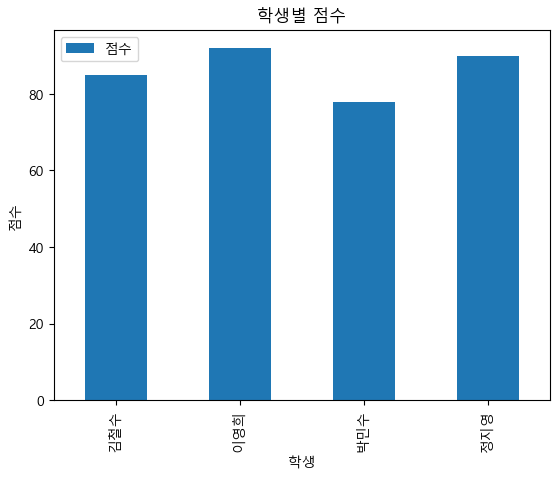

In [135]:
# 막대그래프

# (막대) 그래프 그리기
df1.plot(kind='bar', x='이름', y='점수')
# 그래프 설정하기
plt.title('학생별 점수')
plt.xlabel('학생')
plt.ylabel('점수')
plt.show()

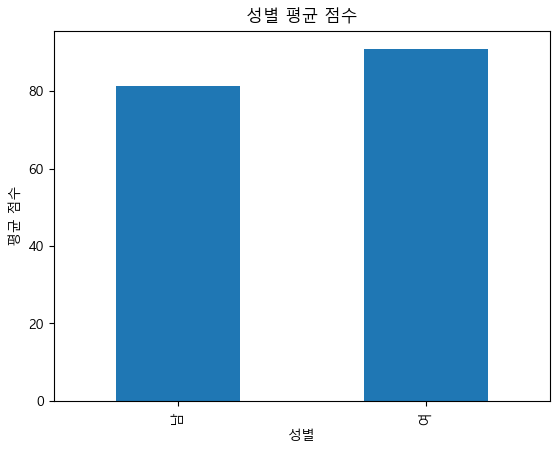

In [138]:
gender_score.plot(kind='bar')
plt.title('성별 평균 점수')
plt.xlabel('성별')
plt.ylabel('평균 점수')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 온라인 쇼핑몰 고객 데이터 (가상)
customer_data = {
    '고객ID': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    '이름': ['김민수', '이지영', '박철호', '정수민', '최영희', '강도현', '윤서연', '임태혁', '송지원', '한미래'],
    '나이': [25, 32, 28, 35, 29, 31, 26, 33, 27, 30],
    '성별': ['남', '여', '남', '여', '여', '남', '여', '남', '여', '여'],
    '구매금액': [50000, 75000, 32000, 98000, 67000, 84000, 41000, 72000, 58000, 89000],
    '구매횟수': [3, 5, 2, 7, 4, 6, 2, 5, 3, 6],
    '회원등급': ['실버', '골드', '브론즈', '플래티넘', '골드', '골드', '실버', '골드', '실버', '플래티넘']
}

df = pd.DataFrame(customer_data)
print("온라인 쇼핑몰 고객 데이터:")
print(df)

온라인 쇼핑몰 고객 데이터:
   고객ID   이름  나이 성별   구매금액  구매횟수  회원등급
0  1001  김민수  25  남  50000     3    실버
1  1002  이지영  32  여  75000     5    골드
2  1003  박철호  28  남  32000     2   브론즈
3  1004  정수민  35  여  98000     7  플래티넘
4  1005  최영희  29  여  67000     4    골드
5  1006  강도현  31  남  84000     6    골드
6  1007  윤서연  26  여  41000     2    실버
7  1008  임태혁  33  남  72000     5    골드
8  1009  송지원  27  여  58000     3    실버
9  1010  한미래  30  여  89000     6  플래티넘


In [ ]:
# 데이터 정보 확인 (행 개수, 열 개수, 컬럼명)

# 데이터 타입 확인

# 기술 통계 요약

# 범주형 데이터 빈도 (성별 카운트, 등급 카운트)


In [ ]:
# 1. 특정 열 선택
print("1. 이름과 구매금액만 선택:")

# 2. 조건부 필터링
print("\n2. 구매금액이 70000원 이상인 고객:")

# 3. 다중 조건 필터링
print("\n3. 여성이면서 구매횟수가 4회 이상인 고객:")

# 4. 특정 값들로 필터링
print("\n4. 골드 또는 플래티넘 회원:")

In [ ]:
# [안배웠지만 검색해서 적용해보기]

# 구매금액 기준 정렬
print("구매금액 기준 내림차순 정렬:")

# 여러 기준으로 정렬 ()
print("\n회원등급별, 구매금액별 정렬:")

In [ ]:
# 금액 계산 (평균, 중앙, 최소, 최대, 표준편차)
print("구매금액 통계:")

# 횟수 계산 (평균, 중앙, 최소, 최대, 표준편차)
print("\n구매횟수 통계:")

In [ ]:
# 성별별(Group) 기본 분석  
print("성별별 분석:")

print('\n횟수, 평균 통계:')

print('\n평균 구매 횟수')

In [ ]:
# 등급별(Group) 기본분석
print('회원 등급별 평균 구매 금액 분석')